# TimeGPT-1

https://docs.nixtla.io/

TimeGPT-1 is a production-ready, generative pretrained transformer model designed for time series forecasting and anomaly detection. It is capable of making accurate predictions across various domains such as retail, electricity, finance, and IoT with minimal code. TimeGPT democratizes access to advanced predictive insights by eliminating the need for specialized machine learning expertise, offering easy and flexible implementation. It also supports fine-tuning with user-specific data and provides low latency for real-time applications.

https://docs.nixtla.io/docs/getting-started-about_timegpt

In [9]:
import pandas as pd
from nixtla import NixtlaClient
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Given time series data
series = [7075, 5558, 5841, 4883, 628, 6506, 4357, 6855, 6397, 5663, 5924,
          1580, 318, 2745, 4104, 5325, 4173, 6102, 6581, 5877, 4559, 3832,
          4445, 4218, 4251, 3687, 3880, 4229, 3737, 3213, 3335, 2950, 1335,
          1675, 2641, 2267]

# Create a pandas DataFrame
df = pd.DataFrame({
    'ds': pd.date_range(start='2015-01-01', periods=len(series), freq='M'),
    'y': series
})
api_key = 'nixtla-tok-Wv2pPn4TVS28jUsFP4kswPXYGY2cFNC5pMFV5x4AiyuTl6L0niEUmAr3EOhPrPWJX89SCfXD3a1kvAXV'
# Initialize the Nixtla client
client = NixtlaClient(api_key = api_key)

# Create a request payload
request_payload = {
    "df": df.to_dict(orient="records"),
    "freq": "M",
    "h": 12  # Number of periods to forecast
}

# Make the forecast request
response = client.forecast(df, h=12)

# Extract forecast data
forecast_df = pd.DataFrame({'ds': response["ds"], 'y': response["TimeGPT"]})


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: M
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [16]:
forecast_df['ds']

0     2018-01-31
1     2018-02-28
2     2018-03-31
3     2018-04-30
4     2018-05-31
5     2018-06-30
6     2018-07-31
7     2018-08-31
8     2018-09-30
9     2018-10-31
10    2018-11-30
11    2018-12-31
Name: ds, dtype: object

In [17]:
forecast_df['y']

0     2299.624756
1     2528.888916
2     2646.561768
3     2825.779785
4     2531.465088
5     2652.744385
6     2654.710205
7     2535.727295
8     2085.375488
9     2102.903320
10    2276.522949
11    2059.194824
Name: y, dtype: float64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


ConversionError: Failed to convert value(s) to axis units: array(['2015-01-31T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-31T00:00:00.000000000', '2015-04-30T00:00:00.000000000',
       '2015-05-31T00:00:00.000000000', '2015-06-30T00:00:00.000000000',
       '2015-07-31T00:00:00.000000000', '2015-08-31T00:00:00.000000000',
       '2015-09-30T00:00:00.000000000', '2015-10-31T00:00:00.000000000',
       '2015-11-30T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-01-31T00:00:00.000000000', '2016-02-29T00:00:00.000000000',
       '2016-03-31T00:00:00.000000000', '2016-04-30T00:00:00.000000000',
       '2016-05-31T00:00:00.000000000', '2016-06-30T00:00:00.000000000',
       '2016-07-31T00:00:00.000000000', '2016-08-31T00:00:00.000000000',
       '2016-09-30T00:00:00.000000000', '2016-10-31T00:00:00.000000000',
       '2016-11-30T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-01-31T00:00:00.000000000', '2017-02-28T00:00:00.000000000',
       '2017-03-31T00:00:00.000000000', '2017-04-30T00:00:00.000000000',
       '2017-05-31T00:00:00.000000000', '2017-06-30T00:00:00.000000000',
       '2017-07-31T00:00:00.000000000', '2017-08-31T00:00:00.000000000',
       '2017-09-30T00:00:00.000000000', '2017-10-31T00:00:00.000000000',
       '2017-11-30T00:00:00.000000000', '2017-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

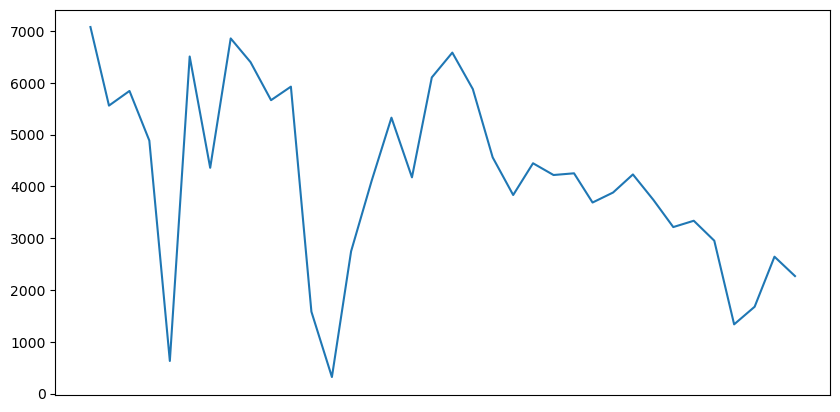

In [11]:
timeline = ['2015-01', '', '', '2015-04', '', '', '2015-07', '', '', '2015-10', '', '',
            '2016-01', '', '', '2016-04', '', '', '2016-07', '', '', '2016-10', '', '',
            '2017-01', '', '', '2017-04', '', '', '2017-07', '', '', '2017-10', '', '', 
            '2018-01', '', '', '2018-04', '', '', '2018-07', '', '', '2018-10', '', '']

# Plot the original series
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label='Original Series')

# Plot the forecast
plt.plot(forecast_df['ds'], forecast_df['y'], label='Forecast', color='purple')

# Add title and labels
plt.title('Time Series Forecast with TimeGPT')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(ticks=range(len(timeline)), labels=timeline, rotation=90)
# Display the plot
plt.show()

In [12]:
# Given time series data
series = [7075, 5558, 5841, 4883, 628, 6506, 4357, 6855, 6397, 5663, 5924,
          1580, 318, 2745, 4104, 5325, 4173, 6102, 6581, 5877, 4559, 3832,
          4445, 4218]

series_test = [4218, 4251, 3687, 3880, 4229, 3737, 3213, 3335, 2950, 1335,1675, 2641, 2267]
timeline_test = ['2016-12-31', '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31']


# Create a pandas DataFrame
df = pd.DataFrame({
    'ds': pd.date_range(start='2015-01-01', periods=len(series), freq='M'),
    'y': series
})
api_key = 'nixtla-tok-A57HuJQcC46ELuGqxzo4RF2Gc93HZZDaB3IgPnZbapZpBoxUgnZiE4moqvB5xGLwo3hJCmHh4fqRiQvM'
# Initialize the Nixtla client
client = NixtlaClient(api_key = api_key)

# Create a request payload
request_payload = {
    "df": df.to_dict(orient="records"),
    "freq": "M",
    "h": 12  # Number of periods to forecast
}

# Make the forecast request
response = client.forecast(df, h=12)

# Extract forecast data
forecast_df = pd.DataFrame({'ds': response["ds"], 'y': response["TimeGPT"]})

timeline = ['2015-01', '', '', '2015-04', '', '', '2015-07', '', '', '2015-10', '', '',
            '2016-01', '', '', '2016-04', '', '', '2016-07', '', '', '2016-10', '', '',
            '2017-01', '', '', '2017-04', '', '', '2017-07', '', '', '2017-10', '', '']

df['ds'] = df['ds'].astype(str)


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: M


ApiError: status_code: 401, body: {'status': 401, 'data': None, 'message': 'Invalid API key', 'details': 'Key not active, verify in https://dashboard.nixtla.io', 'code': 'A13', 'support': 'If you have questions or need support, please email ops@nixtla.io', 'requestID': '5MG2ERTDFQ', 'headers': {}}

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


ConversionError: Failed to convert value(s) to axis units: array(['2015-01-31T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-31T00:00:00.000000000', '2015-04-30T00:00:00.000000000',
       '2015-05-31T00:00:00.000000000', '2015-06-30T00:00:00.000000000',
       '2015-07-31T00:00:00.000000000', '2015-08-31T00:00:00.000000000',
       '2015-09-30T00:00:00.000000000', '2015-10-31T00:00:00.000000000',
       '2015-11-30T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-01-31T00:00:00.000000000', '2016-02-29T00:00:00.000000000',
       '2016-03-31T00:00:00.000000000', '2016-04-30T00:00:00.000000000',
       '2016-05-31T00:00:00.000000000', '2016-06-30T00:00:00.000000000',
       '2016-07-31T00:00:00.000000000', '2016-08-31T00:00:00.000000000',
       '2016-09-30T00:00:00.000000000', '2016-10-31T00:00:00.000000000',
       '2016-11-30T00:00:00.000000000', '2016-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

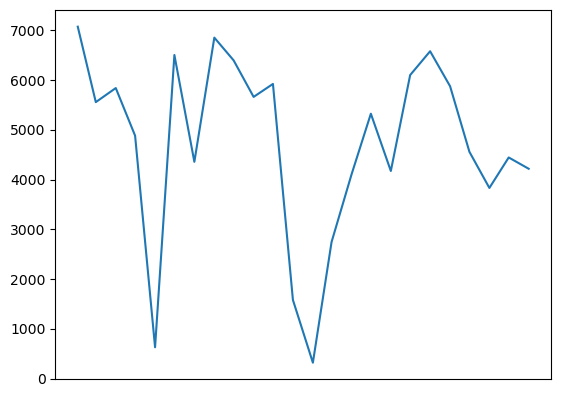

In [13]:
# Given time series data
# Calculate RMSE
series_test_ = [4251, 3687, 3880, 4229, 3737, 3213, 3335, 2950, 1335,1675, 2641, 2267]

actual = np.array(series_test_)
predicted = np.array(list(forecast_df['y']))
rmse = np.sqrt(np.mean((actual - predicted) ** 2))


# Plot the original series
# plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label='Original Series')

plt.plot(pd.array(timeline_test), pd.array(series_test), label='Actual', color='red')
# Plot the forecast
plt.plot(forecast_df['ds'], forecast_df['y'], label='Forecast', color='purple', linestyle='--')



# Add title and labels
plt.title('Time Series Forecast with TimeGPT')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(ticks=range(len(timeline)), labels=timeline, rotation=90)
plt.text(25, 5500, 'RMSE: {:.4f}'.format(rmse))
# Display the plot
plt.show()

In [20]:
def r2_score(actual, predicted):
    mean_of_actual = np.mean(actual)
    ss_total = np.sum((actual - mean_of_actual) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [21]:
print('r2 score', r2_score(actual, predicted))

r2 score -0.18459056479499525


In [22]:
len(actual)

12